1. Delete row with NaN
2. RevolvingUtilizationOfUnsecuredLines maximum 100%
3. delete age 0
4. DebtRatio max 100
5. MonthlyIncome max 100000
6. NumberOfTimes90DaysLate max 25
7. NumberRealEstateLoansOrLines max 10
8. SMOTE
9. Log Transform
10. NumberOfDependents max 5

### Import library

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from imblearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [164]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")
x_valid = joblib.load("data/processed/x_valid.pkl")
y_valid = joblib.load("data/processed/y_valid.pkl")
x_test = joblib.load("data/processed/x_test.pkl")
y_test = joblib.load("data/processed/y_test.pkl")

In [165]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [166]:
dataset.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,SeriousDlqin2yrs
60493,1.000000,41,0,0.075603,6057.0,2,0,1.0,0,0,0
21757,0.860167,46,1,0.537121,5050.0,9,1,0.0,0,2,1
89129,0.272232,31,0,0.398012,2916.0,10,2,0.0,0,0,0
49283,0.940739,44,0,0.509322,12604.0,17,2,2.0,0,0,0
67587,0.000000,48,0,0.499417,6000.0,13,1,2.0,0,0,0


In [167]:
# Original shape
dataset.shape

(72161, 11)

### Remove Outlier

#### Remove NaN

In [168]:
dataset = dataset.dropna()

In [169]:
dataset.shape

(72161, 11)

#### RevolvingUtilizationOfUnsecuredLines maximum 100%

In [170]:
dataset['RevolvingUtilizationOfUnsecuredLines'].describe()

count    72161.000000
mean         5.833723
std        211.022556
min          0.000000
25%          0.035749
50%          0.179137
75%          0.581655
max      22000.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [171]:
dataset = dataset[dataset['RevolvingUtilizationOfUnsecuredLines'] <= 100]

In [172]:
dataset.shape

(72058, 11)

In [173]:
dataset['RevolvingUtilizationOfUnsecuredLines'].describe()

count    72058.000000
mean         0.340216
std          0.660822
min          0.000000
25%          0.035681
50%          0.178478
75%          0.578820
max         85.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### delete age 0

In [174]:
dataset = dataset[dataset['Age'] > 0]
dataset.shape

(72057, 11)

In [175]:
dataset['Age'].describe()

count    72057.000000
mean        51.271965
std         14.395934
min         21.000000
25%         41.000000
50%         51.000000
75%         61.000000
max        102.000000
Name: Age, dtype: float64

#### DebtRatio max 100

In [176]:
dataset['DebtRatio'].describe()

count    72057.000000
mean        27.524528
std        488.456705
min          0.000000
25%          0.144437
50%          0.297028
75%          0.483840
max      61106.500000
Name: DebtRatio, dtype: float64

In [177]:
dataset = dataset[dataset['DebtRatio'] <= 100]

In [178]:
dataset['DebtRatio'].describe()

count    71073.000000
mean         0.499369
std          2.547085
min          0.000000
25%          0.141847
50%          0.292852
75%          0.473158
max         99.000000
Name: DebtRatio, dtype: float64

#### MonthlyIncome max 100000

In [179]:
dataset['MonthlyIncome'].describe()

count    7.107300e+04
mean     6.735001e+03
std      1.022825e+04
min      0.000000e+00
25%      3.500000e+03
50%      5.420000e+03
75%      8.300000e+03
max      1.072500e+06
Name: MonthlyIncome, dtype: float64

In [180]:
dataset = dataset[dataset['MonthlyIncome'] <= 100000]

In [181]:
dataset['MonthlyIncome'].describe()

count     71028.000000
mean       6566.740835
std        5320.338460
min           0.000000
25%        3500.000000
50%        5417.000000
75%        8296.000000
max      100000.000000
Name: MonthlyIncome, dtype: float64

#### NumberOfTimes90DaysLate max 25

In [182]:
dataset['NumberOfTimes90DaysLate'].describe()

count    71028.000000
mean         0.203258
std          3.338608
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [183]:
dataset = dataset[dataset['NumberOfTimes90DaysLate'] <= 25]

In [184]:
dataset['NumberOfTimes90DaysLate'].describe()

count    70947.000000
mean         0.091660
std          0.487763
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: NumberOfTimes90DaysLate, dtype: float64

#### NumberRealEstateLoansOrLines max 10

In [185]:
dataset['NumberRealEstateLoansOrLines'].describe()

count    70947.000000
mean         1.059115
std          1.158609
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [186]:
dataset = dataset[dataset['NumberOfTimes90DaysLate'] <= 10]

In [187]:
dataset['NumberRealEstateLoansOrLines'].describe()

count    70939.000000
mean         1.058910
std          1.157912
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

#### NumberOfDependents max 5

In [188]:
dataset['NumberOfDependents'].describe()

count    70939.000000
mean         0.855129
std          1.153602
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         20.000000
Name: NumberOfDependents, dtype: float64

In [189]:
dataset = dataset[dataset['NumberOfDependents'] <= 5]

In [190]:
dataset['NumberOfDependents'].describe()

count    70794.000000
mean         0.843136
std          1.121791
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          5.000000
Name: NumberOfDependents, dtype: float64

#### Drop NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse

In [191]:
dataset = dataset.drop(['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

### SMOTE

In [192]:
from imblearn.over_sampling import SMOTE

In [193]:
dataset.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [194]:
x_dataset = dataset[['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents']]
y_dataset = dataset['SeriousDlqin2yrs']

In [195]:
dataset.head()

,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDlqin2yrs
60493,1.000000,41,0,0.075603,6057.0,2,0,1.0,0
21757,0.860167,46,1,0.537121,5050.0,9,1,0.0,1
89129,0.272232,31,0,0.398012,2916.0,10,2,0.0,0
49283,0.940739,44,0,0.509322,12604.0,17,2,2.0,0
67587,0.000000,48,0,0.499417,6000.0,13,1,2.0,0


In [196]:
y_dataset.value_counts()

0    65901
1     4893
Name: SeriousDlqin2yrs, dtype: int64

In [197]:
sm = SMOTE(random_state = 12, sampling_strategy = 1.0)
x_dataset_res, y_dataset_res = sm.fit_resample(x_dataset,y_dataset)

In [198]:
y_dataset_res.value_counts()

0    65901
1    65901
Name: SeriousDlqin2yrs, dtype: int64

#### Need to makesure which ratio is the best, using logistic regression

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)
grid_result = gsc.fit(x_dataset, y_dataset)

In [201]:
clf = LogisticRegression(**grid_result.best_params_).fit(x_dataset, y_dataset)

In [202]:
x_test = joblib.load("data/processed/x_test.pkl")
y_test = joblib.load("data/processed/y_test.pkl")

In [203]:
test = pd.concat([x_test, y_test], axis = 1)
test =test.dropna()
x_test = test[['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents']]
y_test = test['SeriousDlqin2yrs']

In [204]:
Y_Test_Pred = clf.predict(x_test)

In [205]:
pd.crosstab(Y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,8044,374
1,909,295


In [206]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [207]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.866659738100187
Precision =  0.24501661129568106
Recall =  0.44095665171898357
F1 Score =  0.3150026695141484


In [208]:
def generate_auc_roc_curve(clf, x_test):
    y_pred_proba = clf.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

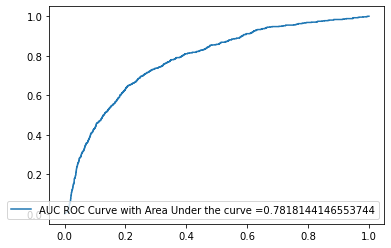

In [209]:
generate_auc_roc_curve(clf, x_test)

In [210]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

In [211]:
# pipe = make_pipeline(
#     SMOTE(),
#     LogisticRegression()
# )

# weights = np.linspace(0.005, 0.25, 10)

# pipeline = make_pipeline(SMOTE(), RandomForestClassifier(random_state=42))
# parameters = {
#     'smote__sampling_strategy': ['auto', 0.5, 0.7, 0.9],
#     'randomforestclassifier__n_estimators': [50, 100, 200]
# }

# scoring_metric = 'f1'

# gsc = GridSearchCV(pipeline, parameters, cv=5, scoring=scoring_metric, verbose=1
# )

# grid_result = gsc.fit(x_dataset, y_dataset)

# # print("Best parameters : %s" % grid_result.best_params_)
# # weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
# #                                    'weight': weights })
# # weight_f1_score_df.plot(x='weight')

In [212]:
# grid_result = gsc.fit(x_dataset, y_dataset)

In [213]:
# print("Best parameters : %s" % grid_result.best_params_)
# # weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
#                                    # 'weight': weights })
# # weight_f1_score_df.plot(x='weight')

In [214]:
sm = SMOTE(random_state = 12, sampling_strategy = 'auto')
x_dataset_res, y_dataset_res = sm.fit_resample(x_dataset,y_dataset)

In [215]:
y_dataset_res.value_counts()

0    65901
1    65901
Name: SeriousDlqin2yrs, dtype: int64

In [216]:
y_dataset_res.value_counts()

0    65901
1    65901
Name: SeriousDlqin2yrs, dtype: int64

### Modeling

### - Random Forest

In [217]:
model_rf = RandomForestClassifier()

In [218]:
# Train model
model_rf.fit(x_dataset_res, y_dataset_res)

RandomForestClassifier()

#### Evaluation and Metrics

In [219]:
# x_valid = x_valid.dropna()

In [222]:
x_valid = x_valid[['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents']]

In [223]:
y_pred = model_rf.predict(x_valid)

In [224]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     35812
           1       0.23      0.33      0.28      2674

    accuracy                           0.88     38486
   macro avg       0.59      0.63      0.60     38486
weighted avg       0.90      0.88      0.89     38486



In [ ]:
x_test = x_test[['RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents']]

In [226]:
y_pred = model_rf.predict(x_test)

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8953
           1       0.25      0.34      0.29       669

    accuracy                           0.88      9622
   macro avg       0.60      0.63      0.61      9622
weighted avg       0.90      0.88      0.89      9622



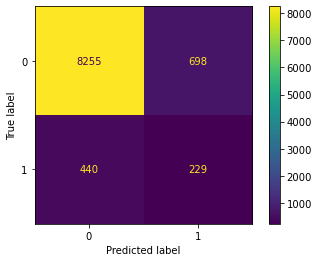

In [230]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### - XGBoost

In [231]:
model_xgb = XGBClassifier()
model_xgb.fit(x_dataset_res, y_dataset_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [232]:
xgb_pred = model_xgb.predict(x_valid)

In [234]:
print(classification_report(y_valid, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     35812
           1       0.23      0.35      0.28      2674

    accuracy                           0.88     38486
   macro avg       0.59      0.63      0.61     38486
weighted avg       0.90      0.88      0.89     38486



In [236]:
y_pred = model_xgb.predict(x_test)

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8953
           1       0.24      0.35      0.28       669

    accuracy                           0.88      9622
   macro avg       0.59      0.63      0.61      9622
weighted avg       0.90      0.88      0.89      9622



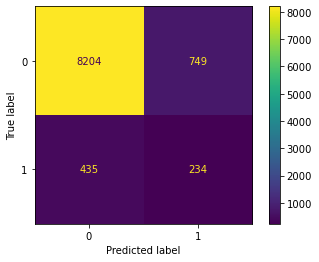

In [238]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [243]:
import src.util as utils

In [245]:
utils.pickle_dump(model_xgb, "models/production_model_path.pkl")

------------------------

#### Bekas SMOTE

In [ ]:
# ratio = 0.9
# sampling_strategy = {0: len(y_dataset_res[y_dataset_res == 1]), 
#                      1: int(ratio * len(y_dataset_res[y_dataset_res == 1]))}

# smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
# X_balanced, y_balanced = smote.fit_resample(x_dataset,y_dataset)

In [ ]:
# ratio = 0.9

In [ ]:
# int(ratio * len(y_dataset_res[y_dataset_res == 1]))

In [ ]:
# y_dataset.value_counts()

In [ ]:
# y_balanced.value_counts()

In [ ]:
# X_balanced

### Coba ke2

In [ ]:
# minority_class = y_dataset[y_dataset == 1]
# majority_class = y_dataset[y_dataset == 0]

# minority_size = len(minority_class)
# majority_size = len(majority_class)
# desired_minority_size = int(majority_size * 0.9)
# ratio = desired_minority_size / minority_size
# sampling_strategy = {0: int(ratio * minority_size), 1: majority_size}
# smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(x_dataset,y_dataset)

#### Coba ke3

In [ ]:
# from imblearn.under_sampling import NearMiss

In [ ]:
# count_class_0 = 59307
# count_class_1 = 59307
# pipe = make_pipeline(
#     SMOTE(sampling_strategy={0: count_class_0}),
#     NearMiss(sampling_strategy={1: count_class_1}))

In [ ]:
# X_resampled, y_resampled = pipe.fit_resample(x_dataset, y_dataset)